tp_partie1.py


TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE

PORTEFEUILLE A
Moyenne: 0.94%
Std: 0.48%
Mediane: 1.00%
Rendement annuel: 11.85%
Volatilite annuelle: 1.65%

PORTEFEUILLE B
Moyenne: 2.89%
Std: 4.45%
Mediane: 4.70%
Rendement annuel: 40.79%
Volatilite annuelle: 15.41%


/tmp/ipython-input-485605385.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([rendements_A,rendements_B],labels=["A","B"])


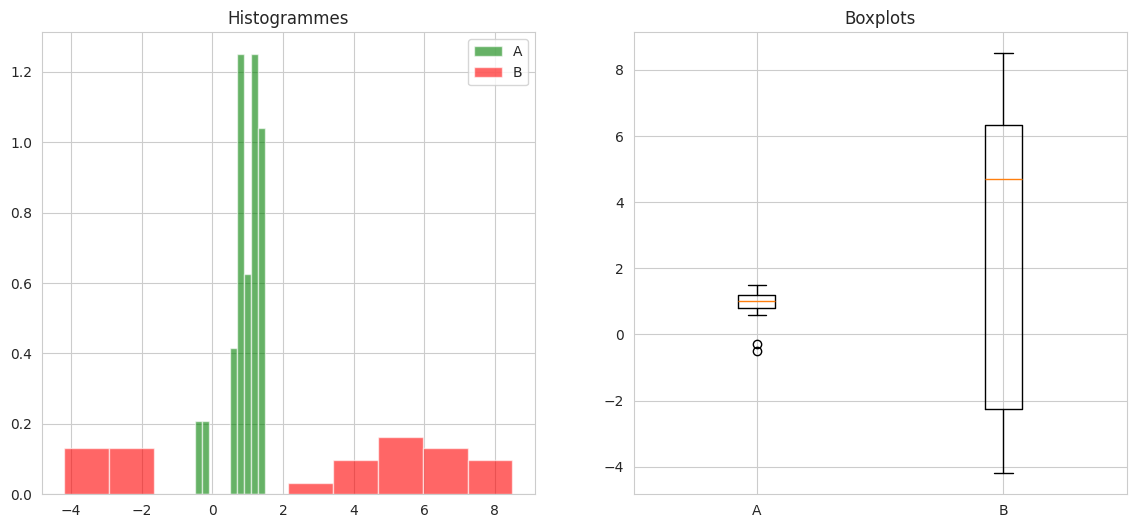


VaR A: (np.float64(9.12987582914035), np.float64(45649.37914570174))
VaR B: (np.float64(15.446136977419759), np.float64(77230.68488709879))

Test normalite Shapiro
A: ShapiroResult(statistic=np.float64(0.803209338591415), pvalue=np.float64(0.0003325496638095976))
B: ShapiroResult(statistic=np.float64(0.8365521747567006), pvalue=np.float64(0.001242967311174172))

Sharpe A: 5.353494544180064
Sharpe B: 2.4527230142300254


In [1]:
# ============================================================
# TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14,6)

print("="*80)
print("TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("="*80)

# ============================================================================
# DONNEES
# ============================================================================

rendements_A = np.array([
1.2,0.8,-0.5,1.5,0.9,1.1,0.7,1.3,1.0,0.6,1.4,0.8,
1.1,0.9,-0.3,1.2,1.0,1.5,0.8,1.3,0.9,1.1,1.2,1.0
])

rendements_B = np.array([
4.5,-2.1,6.2,-3.5,5.8,7.1,-1.8,4.9,3.2,-4.2,8.5,-2.7,
5.1,6.8,-3.1,7.3,4.5,-2.9,6.7,5.3,-3.8,7.9,4.2,5.5
])

capital = 500000
perte_max_toleree = 50000
taux_sans_risque = 3.0

# ============================================================================
# QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# ============================================================================

def calculer_stats_portefeuille(rendements, nom):

    moyenne_mensuelle = np.mean(rendements)
    ecart_type_mensuel = np.std(rendements, ddof=1)
    mediane = np.median(rendements)

    rendement_annuel = ((1 + moyenne_mensuelle/100)**12 - 1) * 100
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    return {
        'nom': nom,
        'moyenne_mensuelle': moyenne_mensuelle,
        'ecart_type_mensuel': ecart_type_mensuel,
        'mediane': mediane,
        'rendement_annuel': rendement_annuel,
        'volatilite_annuelle': volatilite_annuelle
    }

stats_A = calculer_stats_portefeuille(rendements_A,"A")
stats_B = calculer_stats_portefeuille(rendements_B,"B")

for stats_p in [stats_A,stats_B]:
    print(f"\nPORTEFEUILLE {stats_p['nom']}")
    print(f"Moyenne: {stats_p['moyenne_mensuelle']:.2f}%")
    print(f"Std: {stats_p['ecart_type_mensuel']:.2f}%")
    print(f"Mediane: {stats_p['mediane']:.2f}%")
    print(f"Rendement annuel: {stats_p['rendement_annuel']:.2f}%")
    print(f"Volatilite annuelle: {stats_p['volatilite_annuelle']:.2f}%")

# ============================================================================
# QUESTION 1.2 — VISUALISATION
# ============================================================================

fig,axes=plt.subplots(1,2)

axes[0].hist(rendements_A,bins=10,alpha=0.6,color='green',label="A",density=True)
axes[0].hist(rendements_B,bins=10,alpha=0.6,color='red',label="B",density=True)
axes[0].legend()
axes[0].set_title("Histogrammes")

axes[1].boxplot([rendements_A,rendements_B],labels=["A","B"])
axes[1].set_title("Boxplots")

plt.show()

# ============================================================================
# QUESTION 1.3 — VAR
# ============================================================================

def calculer_var(stats_dict):
    z_alpha = stats.norm.ppf(0.05)
    var_annuelle_pct = stats_dict['rendement_annuel'] + z_alpha*stats_dict['volatilite_annuelle']
    var_annuelle_euros = capital*(var_annuelle_pct/100)
    return var_annuelle_pct,var_annuelle_euros

var_A = calculer_var(stats_A)
var_B = calculer_var(stats_B)

print("\nVaR A:",var_A)
print("VaR B:",var_B)

print("\nTest normalite Shapiro")
print("A:",stats.shapiro(rendements_A))
print("B:",stats.shapiro(rendements_B))

# ============================================================================
# QUESTION 1.4 — SHARPE
# ============================================================================

def sharpe(stats_dict):
    return (stats_dict['rendement_annuel']-taux_sans_risque)/stats_dict['volatilite_annuelle']

print("\nSharpe A:",sharpe(stats_A))
print("Sharpe B:",sharpe(stats_B))


tp_partie2.py


TP PARTIE 2 — THEOREME DE BAYES

P(defaut|retard) = 0.29629629629629634
P(defaut|retard et decouvert) = 0.6459627329192548


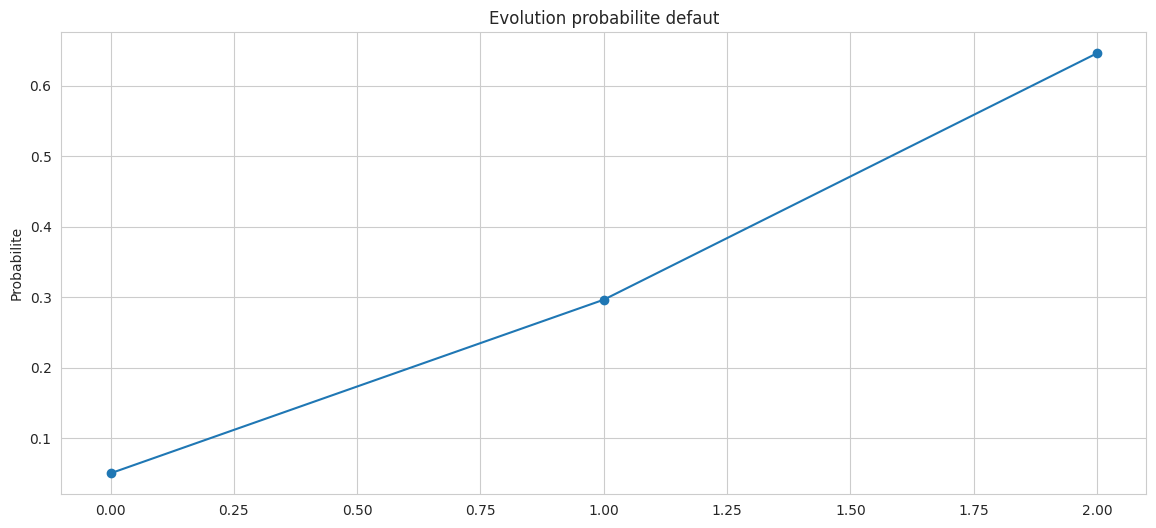

In [2]:
# ============================================================
# TP PARTIE 2 — THEOREME DE BAYES
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("TP PARTIE 2 — THEOREME DE BAYES")
print("="*80)

# Donnees
prior = 0.05
P_retard_defaut = 0.80
P_retard_non = 0.10

# P(Retard)
P_retard = P_retard_defaut*prior + P_retard_non*(1-prior)

# Bayes
posterior = (P_retard_defaut*prior)/P_retard

print("\nP(defaut|retard) =",posterior)

# Deuxieme evenement : decouvert
P_dec_defaut = 0.65
P_dec_non = 0.15

P_dec = P_dec_defaut*posterior + P_dec_non*(1-posterior)
posterior2 = (P_dec_defaut*posterior)/P_dec

print("P(defaut|retard et decouvert) =",posterior2)

# Evolution graphique
etapes=[prior,posterior,posterior2]
plt.plot(etapes,marker='o')
plt.title("Evolution probabilite defaut")
plt.ylabel("Probabilite")
plt.show()
